### Random Sample imputation
- Imput by any random value of that particular column.

#### Advantages:
- Preserves the variance of the variable and shape of distribution.
- Well suited for linear models as it does not distort the distributiont.
- No impact over outliers

#### Disadvantages:
- Memory heavy for deployment,as we need to store the original training set to extract values from and replace the NA in the coming obervations.

- Covarinace with other variablees get disturbed because of randomness.

- If more data is missing then it is not good technique. In case of categorical varibale, this can change the ratio of categories or even in case of numerical variable also variance can be changed.

In [51]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [53]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [54]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

- Only Age column has 19% missing values

In [55]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [58]:
# adding new age_imputed column so that we will able to compare real one with imputed one
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [59]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [60]:
# random sample imputation
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [61]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,49.0
493,71.0,49.5042,71.0
527,NaN,221.7792,2.0


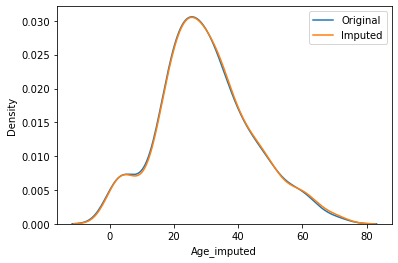

In [62]:
# plot comparison between Age and Age_imputed column
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

- Here we can see that almost both the plots are same.
- So it indicate that we can go with this kind of imputation technique for particular Age column for this data set.
- As stated above, it preseves the distribution of Age column.

In [63]:
# variance comparison between Age and Age_imputed
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  207.50162663995943


- Variance also not get disturbed by much amount.

In [64]:
# let's have a look at covariance
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,46.102100
Age,71.512440,204.349513,204.349513
Age_imputed,46.102100,204.349513,207.501627


- covarinace get disturbed

<AxesSubplot:>

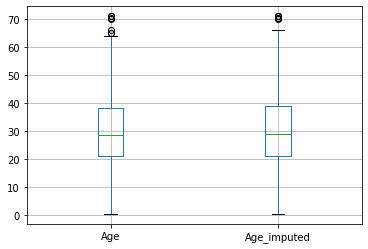

In [65]:
X_train[['Age', 'Age_imputed']].boxplot()

- There is not impact on outliers.

In [72]:
# for same input if we want to get same random value beacuse while prediction it may be possible that user will give same input
# some time on that time it will be good to get same random value, for that we have to use random_state
# suppose for same Fare we want same random Age
df["Fare"][0]

7.25

In [73]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(df["Fare"][0]))
sampled_value

666    25.0
Name: Age, dtype: float64

## Another Data

In [38]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [39]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [40]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

- FireplaceQu has 47% missing values and GarageQual is having 5%.
- Let's see how this technique works in these variable.

In [74]:
X = data
y = data['SalePrice']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [77]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
642,TA,TA,345000,TA,TA
429,TA,TA,175000,TA,TA
1403,NaN,TA,282922,TA,NaN
1145,Gd,TA,149000,TA,Gd
594,NaN,TA,110000,TA,NaN


In [45]:
# rndom sample imputation
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [46]:
# a temp dataframe to store categories percentage in GarageQual and GarageQual_imputed, so that we can compare

temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [47]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


- Here catefories of categorical column GarageQual are almost same before and after imputation.

In [48]:
# a temp dataframe to store categories percentage in FireplaceQu and FireplaceQu_imputed, so that we can compare.

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.537598
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.033670


- Here we can observe that categories ratio of FireplaceQU got disturbed after imputation.
- This is because in FireplaceQu column, more number of missing values (~48%) were present.

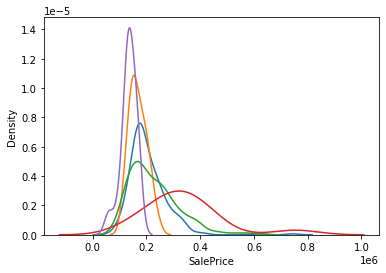

In [49]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

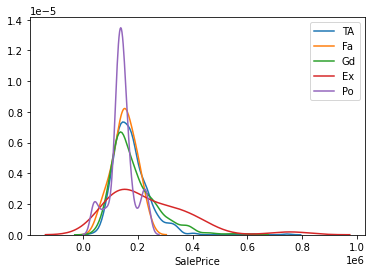

In [153]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

- Distribution of sales price for each category in FireplaceQu got disturbed after imputation.

In [81]:
# Code Ends Here
print("-"*54, "End of Code", "-"*54)

------------------------------------------------------ End of Code ------------------------------------------------------
